# D2 Recreating  W E B Du Bois Visualisation
---
### Thirty days of Data Visualisations
JWriggy

Inspired by a [challenge](https://github.com/ajstarks/dubois-data-portraits/tree/master/challenge) to recreate some of Du Bois's classic visualisations.

Using a multiindex table and creating 6 horizontal stacked bar plots.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('db.mplstyle')

In [2]:
# The data
df = pd.read_csv('data/Dubois2.csv', index_col=['Age','Population'])

# cumulative sum by row
dfCum = df.cumsum(axis=1)

# text
title = 'CONJUGAL CONDITION'
splits = df.columns
legendText = [s.upper() for s in splits]

# bar labels
catTitle= 'AGE' #df.index.names[0].upper()
catLabels = ['15-40','40-60','60\nAND\nOVER'] #[p.upper() for p in df.index.unique(level=0)]
barLabels = [a.upper() for a in df.index.get_level_values(1).values]

# ylocs for 3 pairs of bars
barYs = [7,6,4.5,3.5,2,1]
catYs = [6.5,4,1.5]

# style
colors = ['#dc143c', '#ffd700','#669966'] 
h2 = {'fontsize': 10, 'alpha': 0.6,  'ha':'right', 'va':'center'}
font = {'size':10}

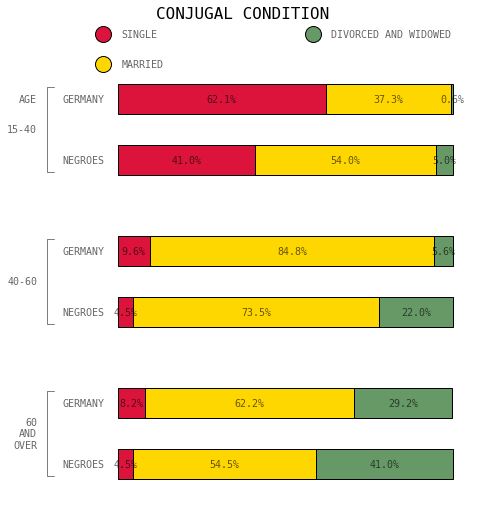

In [8]:
fig,ax = plt.subplots(figsize=(8,8))
ax.set_frame_on(False)
ax.tick_params(labelleft=False,labelbottom=False )

# plot bars
for i, (split, c) in enumerate(zip(splits, colors)):
    widths = df[split]
    starts = dfCum[split] - widths
    ax.barh(barYs, widths, 0.5, left=starts, label=split, color=c, edgecolor='k')
    for (x,y,w) in zip(starts + widths/2,barYs, widths):
            ax.text(x, y, str(w)+'%', fontdict=h2, ha='center')
    
# legend
red_dot, = plt.plot([], "o",color=colors[0], markeredgecolor='k',markersize=16)
yellow_dot, = plt.plot([], "o",color=colors[1], markeredgecolor='k', markersize=16)
green_dot, = plt.plot([], "o",color=colors[2], markeredgecolor='k', markersize=16)
ax.legend([red_dot, yellow_dot, green_dot], legendText, labelcolor='#666666',
          loc='upper center', prop=font, labelspacing=2,bbox_to_anchor=(0.55, 1.1), 
          columnspacing=14, ncol=2, frameon=False)

# annotation
i = 0; x = -24
ax.text(x,barYs[0], catTitle, fontdict=h2)
for y,cat in zip(catYs,catLabels):
    ax.text(x,y, cat, fontdict=h2)
    ax.plot([x+5,x+3,x+3,x+5],[y+.7,y+.7,y-.7,y-.7], lw=.5, color='k')
    ax.text(-4,y+.5,barLabels[i], fontdict=h2)
    ax.text(-4,y-.5,barLabels[i+1], fontdict=h2)
    i = i+2
    
fig.suptitle(title, fontsize=16, ha='center')

plt.savefig("vis/D2_duBois2.pdf")
plt.show()